In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
import torchvision as tv
import os
import pandas as pd

In [8]:
arch = !ls /media/agustin/1D36257C5C6244CB/CNN_BREAST_CANCER_DATASET/fold1/test/100X/SOB_*




data_test = np.array([0,0])
i = 0
for filename in arch:
    i+=1
    img = Image.open(filename)

    if str(filename)[78]== 'M':tag = 1
    elif str(filename)[78]== 'B': tag = 0
    else: print(filename)
    data_test = np.vstack((data_test, (np.array(np.array(img)),tag)))

    

In [2]:
arch = !ls /media/agustin/1D36257C5C6244CB/CNN_BREAST_CANCER_DATASET/fold1/train/100X/SOB_*


train_tag = np.array([])
data_train = np.array([])
i = 0
for filename in arch:
    i+=1
    img = Image.open(filename)
 
    if str(filename)[79]== 'M':tag = 1
    elif str(filename)[79]== 'B': tag = 0
    data_train = np.vstack((data_train, (np.array(img, dtype= np.float32))))
    
    

1 1321


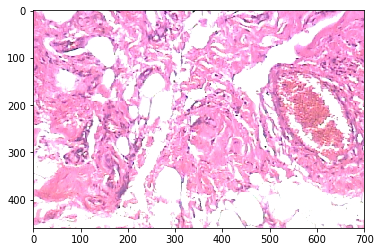

In [4]:
#randperm = torch.randperm(len(data_test[1:]))

#test = data_test[1:][randperm]

#print(test[582,1], len(test))
#plt.imshow( test[582,0])

#plt.show()
randperm = torch.randperm(len(data_train[1:]))

train = data_train[1:][randperm]

print(train[582,1], len(train))
plt.imshow( train[582,0].astype(int))
plt.show()

## Cambia el tamaño de todas las imagenes a 456

In [6]:
for i in range(len(train)):
    if len([i for i,j in train][i])==460: 
        train[i,0]= train[i,0][:-4,:,:]

#for i in range(len(test)):
#    if len([i for i,j in test][i])==460:
#        test[i,0]= test[i,0][:-4,:,:]

In [ ]:
## Esta linea la dejo asi, funciones virtuales...
from torch.utils.data import TensorDataset, DataLoader

trn_inputs = torch.tensor([i for i,j in train ])
print('trn data listo')
trn_target = torch.tensor([j for i,j in train ])
print('trn tag listo')
#tst_inputs = torch.tensor([i for i,j in test ])
#print('tst data listo')
#tst_target = torch.tensor([j for i,j in test ])
#print('tst tag listo')


B = 20

trn_data = TensorDataset(torch.tensor( trn_inputs , dtype=torch.float32), trn_target)
#tst_data = TensorDataset(torch.tensor( tst_inputs , dtype=torch.float32), tst_target)

trn_load = DataLoader( trn_data, batch_size=B)
#tst_load = DataLoader( tst_data, batch_size=B)

In [15]:


### iter() genera una iteración sobre los datos, ahi le puedo hacer next() para ver el siguiente
idata = iter(trn_load)
image , label = next(idata)

image = image/255

data_image = torch.transpose(torch.transpose(image,2,3),1,2)


In [ ]:
print(image[0...].shape)

In [ ]:
print(image[0,...].shape, image.shape)
plt.imshow(image[0,...])
plt.show()

c1 = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=5, stride= 2, padding=2)
out = c1(data_image)

print(image.shape)
print(out.shape)

plt.imshow(torch.transpose(torch.transpose(out[0,...],0,1),1,2).detach().numpy())

plt.show

In [11]:
class Convnet(torch.nn.Module):
    
    def __init__(_,k1=5,s1=2,p1=2,k2=5,s2=1, p2=1, k3=5, s3=3):
        super().__init__()
        
        
        _.c1 = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=k1, stride= s1, padding=p1)
        _.c2 = torch.nn.Conv2d(in_channels= 16, out_channels= 32, kernel_size= k2, stride=s2, padding=p2)
        _.c3 = torch.nn.Conv2d(in_channels= 32, out_channels= 32, kernel_size= k2, stride=s2, padding=p2)        
        _.mp = torch.nn.MaxPool2d(kernel_size=k3, stride= s3)
        _.l1 = torch.nn.Linear(32*22*35,512)
        _.l2 = torch.nn.Linear(512,10)
        
    def forward(_,x):
        
        h1 = _.c1(x)
        print(h1.shape)
        h2 = _.c2(h1)
        print(h2.shape)
        h2_= _.c3(h2)
        print(h2.shape)
        h3 = _.mp(h2_).relu()
        print(h3.shape)
        h4 = _.l1(h3.view(-1,32*8*8)).tanh()
        print(h4.shape)
        h5 = _.l2(h4)
        print(h5.shape)

        return h5

In [ ]:
model = Convnet()


model(data_image)

In [38]:
for t,tag in trn_load:
    print(t.shape)

In [45]:
benign = !ls */train/100X/SOB_B_*



imagenes_b = []
i = 0
for filename in benign:
    i+=1
    img = Image.open(filename)
    imagenes_b.append( torch.tensor(np.array(img)))
    

In [50]:
len(imagenes_m)

2038

In [8]:
tag_m = np.zeros(len(imagenes_m))

tr_img_m = [[ im, t ]for im, t in zip(imagenes_b,tag_m)]


NameError: name 'imagenes_m' is not defined

In [56]:
len(tr_img_b)

2038

In [55]:
tag_b = np.zeros(len(imagenes_b))

tr_img_b = [[ im, t ]for im, t in zip(imagenes_b,tag_b)]




384

In [57]:
tr_img_b.append(tr_img_m)

len(tr_img_b)

2039

In [61]:
tr_img_b

[[tensor([[[203, 192, 196],
           [200, 183, 191],
           [198, 176, 189],
           ...,
           [187, 140, 174],
           [184, 143, 175],
           [185, 150, 182]],
  
          [[198, 185, 192],
           [197, 177, 188],
           [195, 168, 183],
           ...,
           [190, 143, 175],
           [187, 146, 178],
           [186, 151, 181]],
  
          [[196, 180, 190],
           [196, 174, 186],
           [194, 165, 183],
           ...,
           [192, 147, 176],
           [189, 150, 179],
           [191, 158, 187]],
  
          ...,
  
          [[199, 197, 200],
           [200, 200, 200],
           [200, 202, 201],
           ...,
           [194, 158, 186],
           [188, 155, 184],
           [187, 161, 186]],
  
          [[199, 199, 201],
           [202, 204, 203],
           [199, 201, 200],
           ...,
           [194, 158, 186],
           [189, 156, 183],
           [187, 161, 186]],
  
          [[194, 194, 196],
           [19

In [35]:
tr_data = np.vstack((tr_img_m,tr_img_b))

ValueError: only one element tensors can be converted to Python scalars

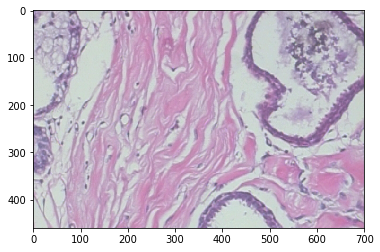

In [25]:
plt.imshow(tr_img[5][0])


In [8]:
imagenes_b[0]

IndexError: too many indices for array

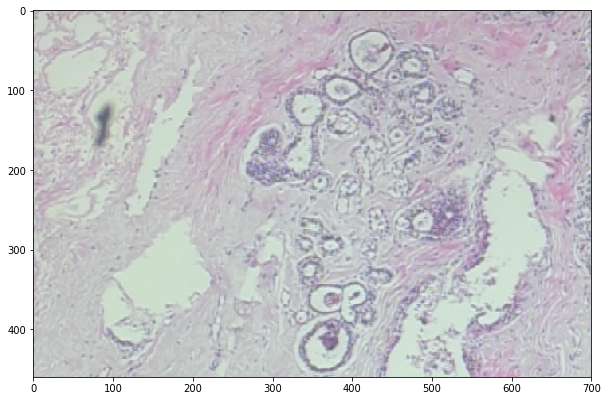

In [5]:
img_ = torch.tensor(np.array(Image.open('fold1/train/40X/SOB_B_A-14-22549AB-40-001.png')))

plt.figure(figsize=(10,10))
plt.imshow(img_)

In [59]:
img = torch.tensor(torch.transpose(torch.transpose(img_,2,1),1,0),dtype=torch.float32)


/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [60]:
c1 = torch.nn.Conv2d(3,10, kernel_size=5)

c1(img.view(1,3,460,700)).shape

torch.Size([1, 10, 456, 696])